# 1. Entendimento do Negócio
    1.1 Objetivo
O principal objetivo deste projeto é agrupar os clientes de um e-commerce em clusters distintos, utilizando a base RFM (Recência, Frequência, Valor Monetário). Isso permitirá que a empresa entenda melhor os padrões de comportamento de seus clientes, possibilitando a segmentação para campanhas de marketing personalizadas, além de melhorar a retenção de clientes e aumentar o retorno sobre investimentos (ROI).

    1.2 Metas do Projeto
Identificar grupos de clientes com comportamentos semelhantes, com base em suas interações e transações no e-commerce.
Utilizar métricas de clusterização para validar a qualidade dos clusters obtidos.
A partir dos clusters gerados, propor estratégias para personalização de ofertas, promoções e comunicação com cada grupo.

# 2. Entendimento dos Dados
    2.1 Coleta de Dados
Os dados utilizados foram retirados do banco de dados do e-commerce, consistindo de informações transacionais, como:

Recência (R): Tempo desde a última compra do cliente.
Frequência (F): Número de transações realizadas pelo cliente em um determinado período.
Valor Monetário (M): Valor total gasto pelo cliente em suas transações.

    2.2 Preparação Inicial
Limpeza de dados: Remoção de registros com dados faltantes ou inconsistentes, além de tratamento de outliers para garantir a robustez do modelo.
Normalização: Para padronizar as escalas dos dados, uma normalização foi aplicada aos atributos R, F e M, garantindo que todos os atributos tivessem pesos iguais no modelo de clusterização.

## Setup

In [93]:
df = pd.read_csv('data.csv', encoding='utf-8', encoding_errors='replace')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [95]:
# Aqui vou realizar a correção dos tipos dos dados
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning:

In [97]:
df.describe() # Aqui percebi alguns dados estranhos, como por exemplo o minimo e o maximo do Quantity e UnitPrice

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [98]:
df.query('Quantity > 80000').head() # explorando mais esses dados estranhos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [99]:
df.query('CustomerID == 16446').head() # Aqui pude perceber que esse Cliente foi o que comprou "mais" e o que comprou negativo, deduzo que foi um erro

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [100]:
df = df.query('UnitPrice > 0 & Quantity > 0')

In [101]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


<Axes: >

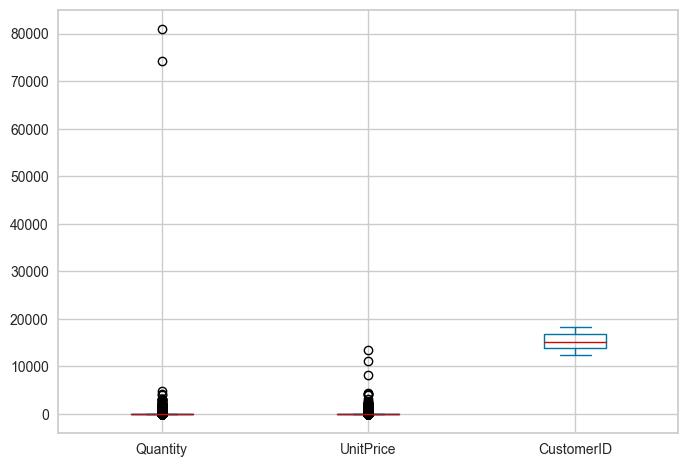

In [102]:
# Aqui realizo o plot box para entender mais os outliers
df.plot.box()

In [103]:
# Irei dropar os outliers e verificar melhor os dados
df = df.query('Quantity < 50000')


<Axes: >

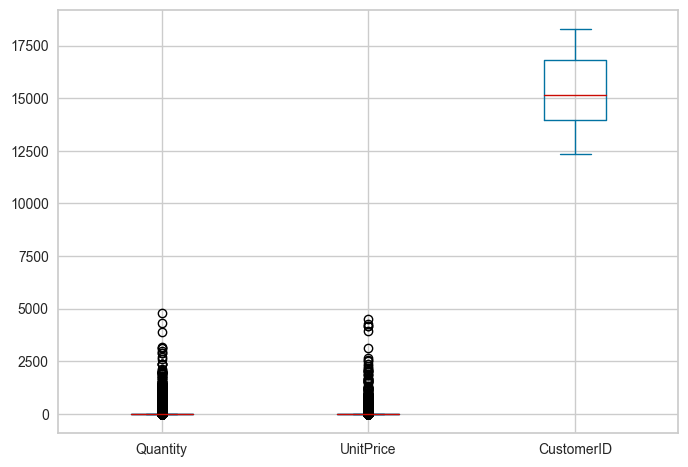

In [104]:
# Também percebo que não será interessante trabalhar com outliers no Unit Price
df = df.query('UnitPrice < 6000')
df.plot.box()

In [105]:
# Aqui percebo dados duplicados. Tomei a decisão que irei dropa-los
df.duplicated().sum()

5226

In [106]:
# Dropando dados duplicados
df.drop_duplicates(inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [107]:
df.shape

(524873, 8)

In [108]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132184
Country             0
dtype: int64

In [109]:
df = df.dropna()

In [110]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5416\1897980743.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [111]:
df['InvoiceDate'].agg(['max', 'min'])

max   2011-12-09 12:50:00
min   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [112]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [113]:
df['CustomerID'] = df['CustomerID'].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5416\4010221730.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
df = df.copy()

## Calculo RFM

### Aqui utilizarei uma data próxima a deste DataSet, já que a data maxima é 2011-12-09

In [115]:
df_rfm = (
    df.groupby('CustomerID')
    .agg(
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2011-12-09 12:50:00') - x.max()).days),
        F = ('InvoiceNo', 'nunique'),
        M = ('Total', 'mean')
        
    )
)

df_rfm

,R,F,M
CustomerID,,,
12347,1,7,23.681319
12348,74,4,57.975484
12349,18,1,24.076027
12350,309,1,19.670588
12352,35,8,29.482824
...,...,...,...
18280,277,1,18.060000
18281,180,1,11.545714
18282,7,2,14.837500


# Step 3 : Data Preparation

# Pre-Processing

In [116]:
df_rfm.head()

,R,F,M
CustomerID,,,
12347,1,7,23.681319
12348,74,4,57.975484
12349,18,1,24.076027
12350,309,1,19.670588
12352,35,8,29.482824


In [117]:
# Irei importar o scale para padronizar os dados para melhor análise
from sklearn.preprocessing import scale

<Axes: >

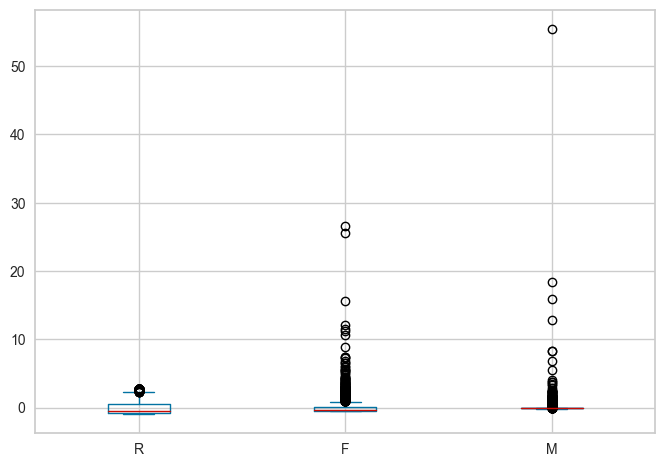

In [118]:
df_rfm.apply(scale).plot.box()

In [119]:
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.895091,-0.165317,55.434689


In [120]:
# Tomei a decisão de dropar esse cliente, para não interferir nas análises
df_rfm = df_rfm.drop(15098)

<Axes: >

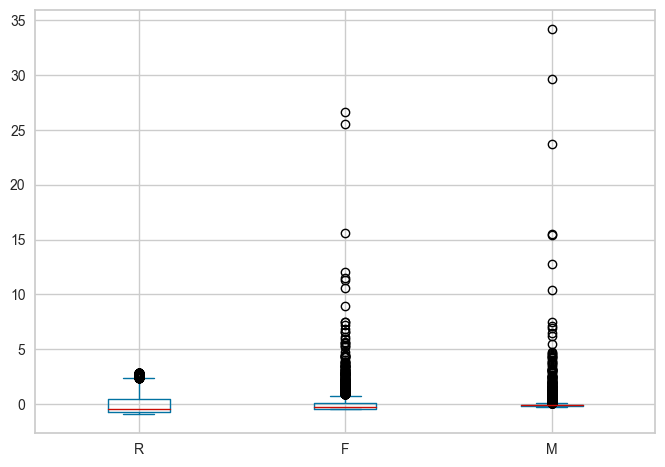

In [121]:
df_rfm.apply(scale).plot.box()

## Transformando os dados em padronizados:

### Irei checar se os dados estão com o desvio padrão e o "max" distante dos 75%

In [122]:
df_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,91.509225,4.272601,34.585253
std,99.970323,7.697927,129.203857
min,0.000000,1.000000,1.450000
25%,17.000000,1.000000,12.381225
50%,50.000000,2.000000,17.737784
75%,141.000000,5.000000,24.853250
max,373.000000,209.000000,4453.430000


In [123]:
# Irei aplicar uma função com "lambda" para ver se os dados normalizam e o std diminui
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,89.750231,3.608164,23.662082
std,95.564917,3.358999,20.978901
min,0.000000,1.000000,1.450000
25%,17.000000,1.000000,12.381225
50%,50.000000,2.000000,17.737784
75%,141.000000,5.000000,24.853250
max,311.000000,13.000000,91.768421


In [124]:
df_rfm_clip_scaler = df_rfm_clip.apply(scale)

# 4. Preparação dos Dados
    3.1 Transformação e Engenharia de Atributos
Os atributos RFM foram convertidos em uma matriz que alimentou os algoritmos de clusterização. Os valores foram normalizados para garantir que nenhuma dimensão tivesse maior influência nos cálculos de distância.

    3.2 Seleção de Técnicas de Clusterização
Foram testados três algoritmos de clusterização:

**K-Means**: Algoritmo baseado em centroides que minimiza a soma das distâncias quadráticas entre os pontos e seus respectivos clusters.

**Hierarchical Clustering**: Um algoritmo hierárquico que agrupa pontos com base em similaridades progressivas.

**Gaussian Mixture**: Baseado em modelos probabilísticos que assumem que os dados foram gerados a partir de uma mistura de várias distribuições gaussianas.

### Kmeans

In [125]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

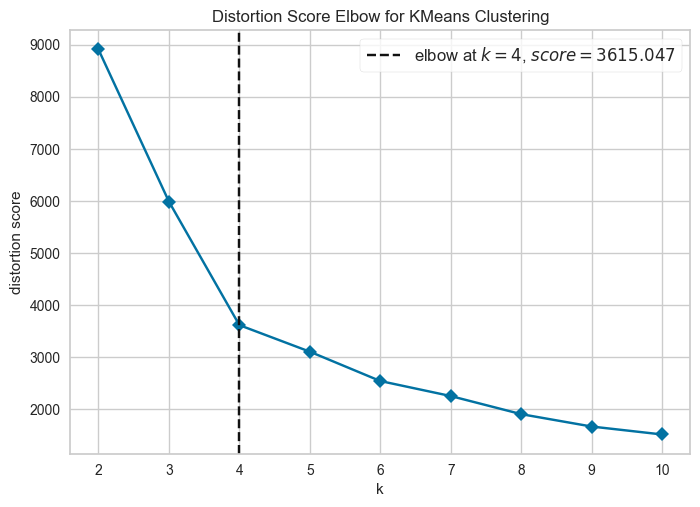

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [126]:
kelbow_visualizer(KMeans(), df_rfm_clip_scaler, k=10, timings=False)

In [127]:
# Criando lista para definir qual o cluster que fica com a melhor métrica

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaler.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,9607.108105,0.481708,1.042363,1534.225004
3,6380.630082,0.395790,0.917932,2250.280065
4,3615.054111,0.479702,0.704459,3751.928503
5,3254.021659,0.336577,0.985575,3245.703234
6,2686.658075,0.340413,0.969972,3327.005378
7,2367.201857,0.375503,0.886621,3243.328549
8,1923.358475,0.391060,0.845722,3563.369927
9,1678.516160,0.400115,0.803412,3650.799150
10,1515.627514,0.351891,0.887165,3644.699406


Pude perceber que cluster = 4 teve o melhor resultado nos parâmetros

In [128]:
import plotly.express as px

In [129]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaler)

In [130]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

## Hierarchical Clustering

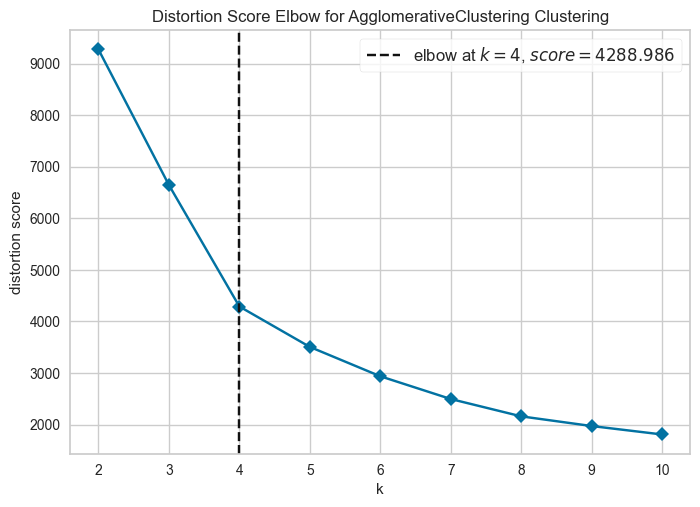

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [131]:
kelbow_visualizer(AgglomerativeClustering(), df_rfm_clip_scaler, k=10, timings=False)

In [132]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaler.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.340962,1.340727,1745.579564
3,0.378879,0.919560,2074.609470
4,0.422037,0.791074,2935.485046
5,0.364449,0.878941,2935.228161
6,0.350973,0.894044,2970.576141
7,0.357475,0.819063,3039.898327
8,0.362145,0.856727,3107.092551
9,0.365606,0.838319,3028.624045
10,0.335465,0.899335,2978.665848


In [133]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaler)

In [134]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

## Gaussian Mixture

In [135]:
from sklearn.mixture import GaussianMixture
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaler.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
30,-13.000327,8,diag
28,6.421485,8,full
24,200.660193,7,full
26,207.965113,7,diag
20,9551.331068,6,full


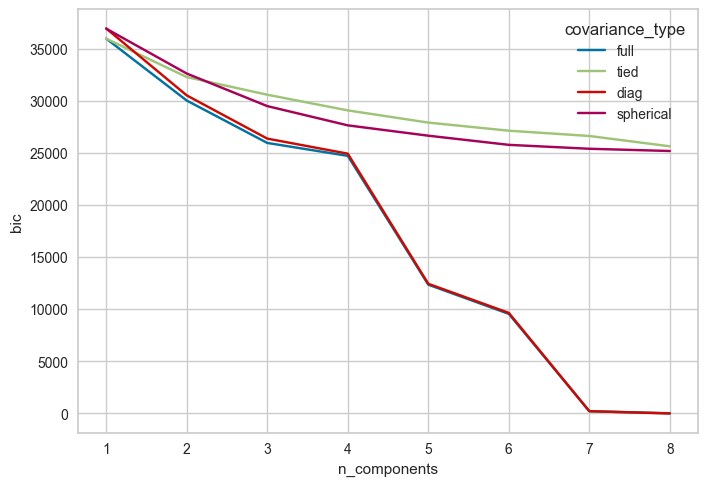

In [136]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [137]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_clip_scaler)

In [138]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

# 5. Avaliação
O modelo K-Means com 4 clusters foi escolhido por ser o que apresentou o melhor desempenho nas métricas de avaliação. A análise dos clusters revelou grupos com comportamentos distintos, permitindo a criação de estratégias direcionadas para cada segmento de clientes.

    5.1 Descrição dos Clusters
Cada cluster representou um perfil de cliente diferente com base nos dados RFM:

**Cluster 1**: Clientes de baixa recência e frequência, mas com baixo valor monetário. 

**Cluster 2**: Clientes que comprar com alto valor monetário, mas com média recência e frequência

**Cluster 3**: Clientes que compram com alta recência, mas baixo valor monetário e frequência

**Cluster 4**: Clientes que compram com alta frequência, mas baixa recência e valor.

In [139]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaler.columns)

In [140]:
import matplotlib.pyplot as plt

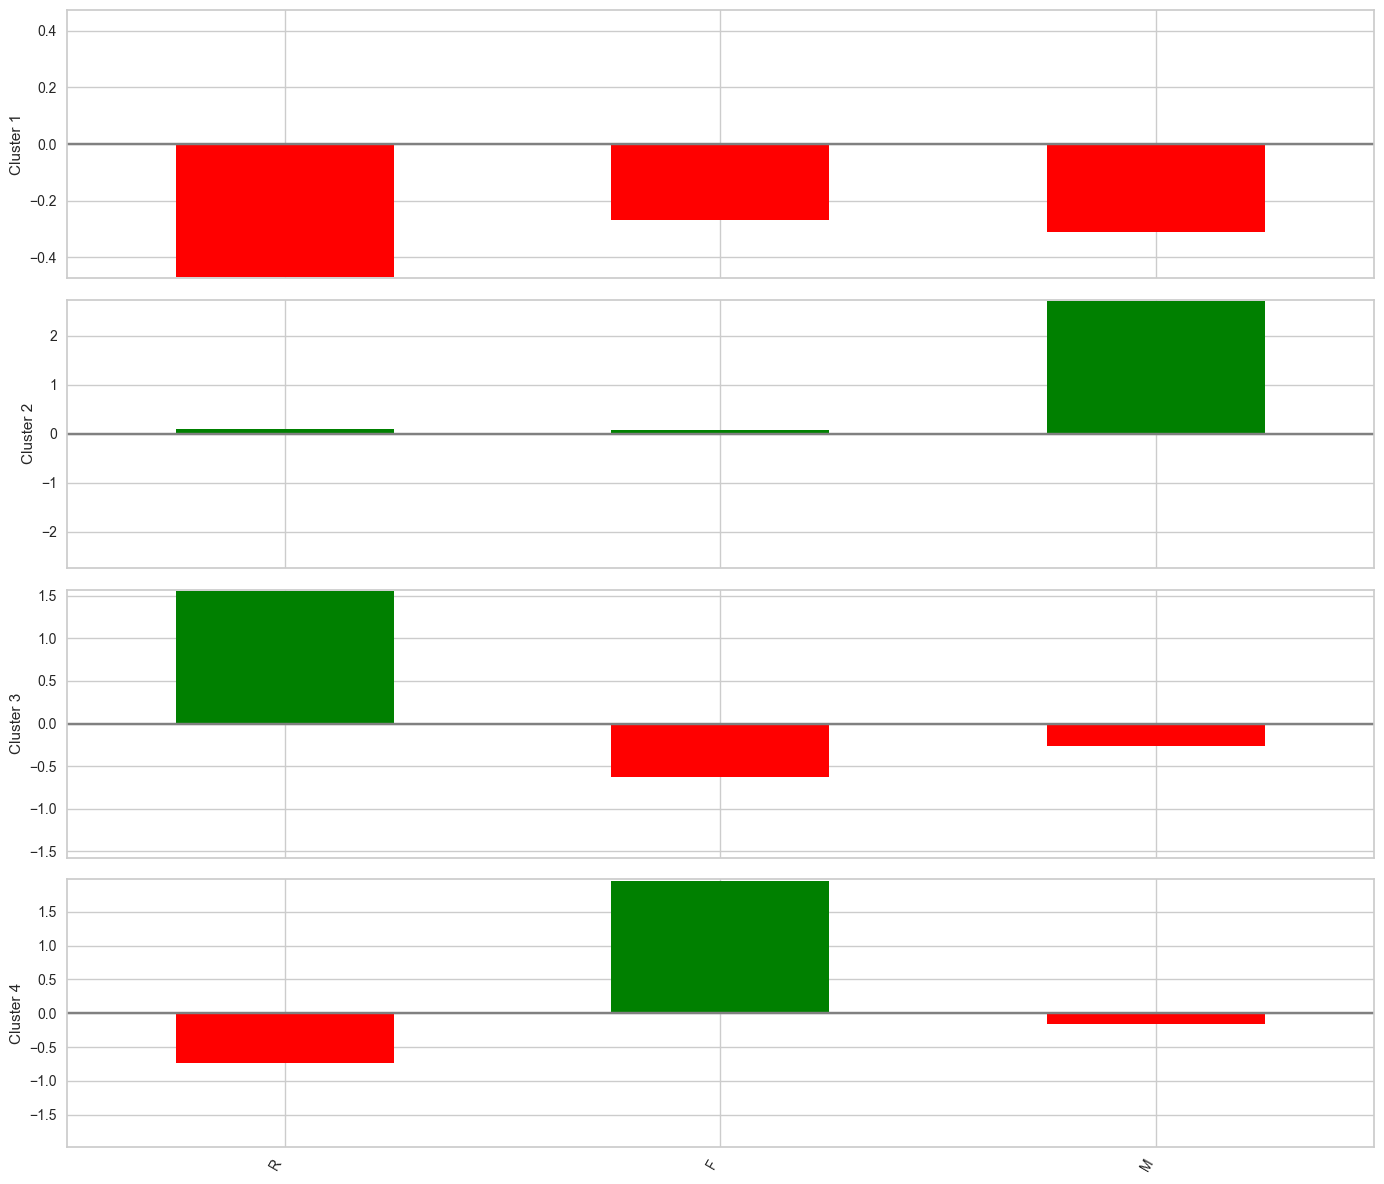

In [141]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()